In [ ]:
# Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Data collection

In [ ]:
hotels = pd.read_csv('/content/drive/MyDrive/data_for_lessons/hotels.csv')

# Let's see our data
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [ ]:
# Let's the info of data
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Find out the number of the unique hotels

In [ ]:
# Number of the unique hotels
hotels['hotel_name'].nunique()

1492

Find out the min/max review's year

In [ ]:
# conversion in datetime format
hotels['review_year'] = pd.to_datetime(hotels['review_date'])
print(hotels['review_year'].min())
print(hotels['review_year'].max())

2015-08-04 00:00:00
2017-08-03 00:00:00


Let's find the number of the unique tags

In [ ]:
# Change type of the 'tags' feature
import ast
hotels['tags_list'] = hotels['tags'].apply(lambda x: ast.literal_eval(x))

In [ ]:
# Create list of tag's lists
tag_list = list(hotels['tags_list'])

In [ ]:
# Find all unique tags
tag_set = set()
for i in tag_list:
  for j in i:
    tag_set.add(j)

print(tag_set)
print(f'Num of unique tags: {len(tag_set)}')

{' Superior Suite 3 Adults ', ' Deluxe Double ', ' Intuition Room ', ' Treat your Partner Package Double Room ', ' Superior Double Room with Balcony and City View ', ' Top Deluxe Room ', ' Twin Deluxe with Canal View ', ' Royal Duplex Suite ', ' Superior King or Twin Room ', ' Art Room XL with Iconic View ', ' Duplex Junior Suite with Spa access ', ' Andaz King Twin Room ', ' Superior Plus Room ', ' Junior Conservatory with King Bed ', ' One Bedroom Suite with Kitchenette ', ' Hyatt Twin Room with View ', ' Suite Canal View ', ' Queen Room with Mobility Access ', ' Palais Suite ', ' Standard Double Room with View ', ' Executive Room with View and Lounge Access ', ' Superior Four Poster Room ', ' Economy Single Room basement no window ', ' One Bedroom River View Suite ', ' Park Junior Suite ', ' Deluxe Twin Room with Eiffel Tower View ', ' Standard Single Room ', ' Quadruple Apartment ', ' Superior Double ', ' Business Double or Twin Room ', ' Double Room with City View ', ' Double or T

Let's find the most popular tag

In [ ]:
# Find the most popular tag
tag_dict = {}
for i in tag_list:
  for j in i:
    if j not in tag_dict:
      tag_dict[j] = 0
    else:
      tag_dict[j] += 1  

for i in tag_dict:
  if tag_dict[i] == max(tag_dict.values()):
    print(f'Most popular tag: {i}- {max(tag_dict.values())}')

Most popular tag:  Leisure trip - 313592


In [ ]:
hotels.drop('tags_list',axis=1,inplace=True)

===================================

# 2. Clearing data

## 2.1. Working with the gaps

In [ ]:
# Find the columns with the gaps
columns_with_null = (hotels.isnull().mean()*100).sort_values(ascending=False)
columns_with_null

lng                                           0.63288
lat                                           0.63288
hotel_address                                 0.00000
additional_number_of_scoring                  0.00000
days_since_review                             0.00000
tags                                          0.00000
reviewer_score                                0.00000
total_number_of_reviews_reviewer_has_given    0.00000
review_total_positive_word_counts             0.00000
positive_review                               0.00000
total_number_of_reviews                       0.00000
review_total_negative_word_counts             0.00000
negative_review                               0.00000
reviewer_nationality                          0.00000
hotel_name                                    0.00000
average_score                                 0.00000
review_date                                   0.00000
review_year                                   0.00000
dtype: float64

In [ ]:
# We'll fill in the None value in 'lng' and 'lat' later
#hotels = hotels.fillna()

## 2.2. Working with the duplicates

In [ ]:
# Find the duplicates
mask = hotels.duplicated()
hotels_duplicates = hotels[mask]
print(f'Number of the duplicates: {hotels_duplicates.shape[0]}')

Number of the duplicates: 307


In [ ]:
# Remove the duplicates
hotels = hotels.drop_duplicates()

mask = hotels.duplicated()
hotels_duplicates = hotels[mask]
print(f'Number of the duplicates: {hotels_duplicates.shape[0]}')

Number of the duplicates: 0


## 2.3. Working with the outliers

In [ ]:
# let see describe of the feature 'additional_number_of_scoring'
hotels['additional_number_of_scoring'].describe()

count    386496.000000
mean        498.504375
std         500.365093
min           1.000000
25%         169.000000
50%         342.000000
75%         660.000000
max        2682.000000
Name: additional_number_of_scoring, dtype: float64

Text(0.5, 1.0, 'Additional_number_of_scoring boxplot')

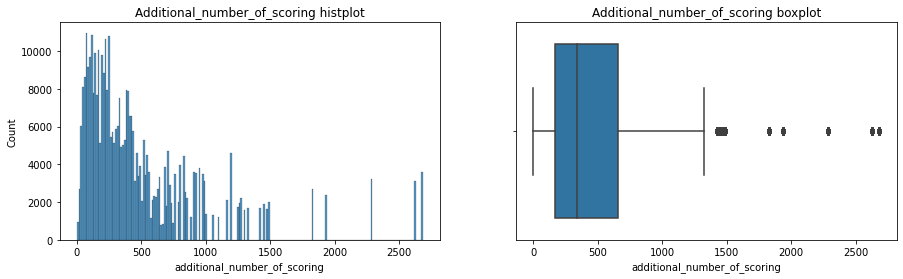

In [ ]:
# build the plots for 'additional_number_of_scoring'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

histplot = sns.histplot(data=hotels, x='additional_number_of_scoring', ax=axes[0])
histplot.set_title('Additional_number_of_scoring histplot')
boxplot = sns.boxplot(data=hotels, x='additional_number_of_scoring', ax=axes[1])
boxplot.set_title('Additional_number_of_scoring boxplot')

In [ ]:
# let see describe of the feature 'total_number_of_reviews'
hotels['total_number_of_reviews'].describe()

count    386496.000000
mean       2744.679231
std        2316.934876
min          43.000000
25%        1161.000000
50%        2134.000000
75%        3633.000000
max       16670.000000
Name: total_number_of_reviews, dtype: float64

Text(0.5, 1.0, 'Total number of reviews boxplot')

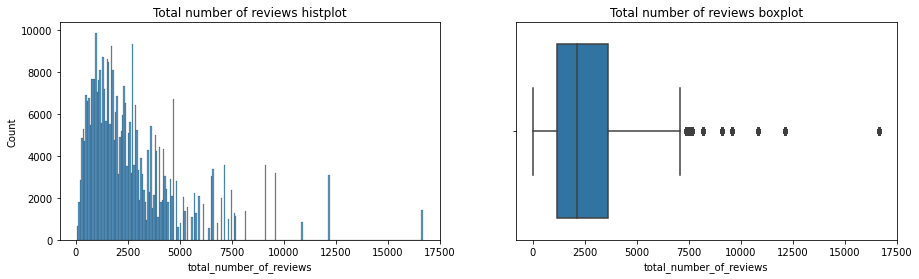

In [ ]:
# build the plots of 'total_number_of_reviews'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

histplot = sns.histplot(data=hotels, x='total_number_of_reviews', ax=axes[0])
histplot.set_title('Total number of reviews histplot')
boxplot = sns.boxplot(data=hotels, x='total_number_of_reviews', ax=axes[1])
boxplot.set_title('Total number of reviews boxplot')

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
  if log_scale:
    x = np.log(data[feature]+1)
  else:
    x = data[feature]
  mu = x.mean()
  sigma = x.std()
  lower_bound = mu - left * sigma
  upper_bound = mu + right * sigma
  outliers = data[(x < lower_bound) | (x > upper_bound)] 
  return outliers

outliers = outliers_z_score(hotels, 'total_number_of_reviews', log_scale=True, left=3, right=3)

print(f'Number of outliers z-score method: {outliers.shape[0]}')

Number of outliers z-score method: 1475


There are too much the outliers.

In [ ]:
# let see describe of the feature 'average_score'
hotels['average_score'].describe()

count    386496.000000
mean          8.397421
std           0.547861
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: average_score, dtype: float64

Text(0.5, 1.0, 'Average score boxplot')

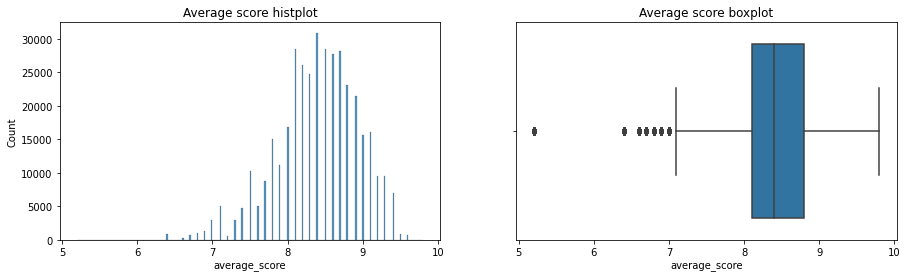

In [ ]:
# build the plots of 'average_score'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

histplot = sns.histplot(data=hotels, x='average_score', ax=axes[0])
histplot.set_title('Average score histplot')
boxplot = sns.boxplot(data=hotels, x='average_score', ax=axes[1])
boxplot.set_title('Average score boxplot')

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
  if log_scale:
    x = np.log(data[feature]+1)
  else:
    x = data[feature]
  mu = x.mean()
  sigma = x.std()
  lower_bound = mu - left * sigma
  upper_bound = mu + right * sigma
  outliers = data[(x < lower_bound) | (x > upper_bound)] 
  return outliers

outliers = outliers_z_score(hotels, 'average_score', log_scale=False, left=3, right=3)

print(f'Number of outliers z-score method: {outliers.shape[0]}')

Number of outliers z-score method: 1930


There are too much the outliers.

In [ ]:
# let see describe of the feature 'review_total_negative_word_counts'
hotels['review_total_negative_word_counts'].describe()

count    386496.000000
mean         18.539400
std          29.703569
min           0.000000
25%           2.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: review_total_negative_word_counts, dtype: float64

Text(0.5, 1.0, 'Review total negative word counts histplot')

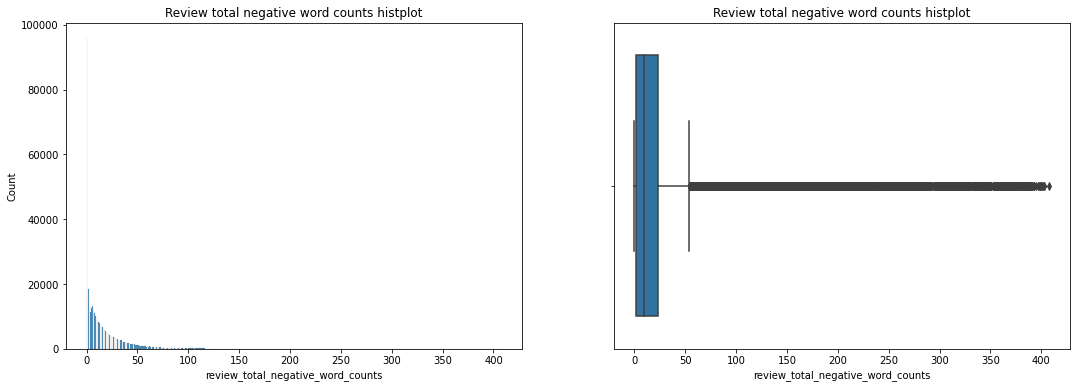

In [ ]:
# build the plots of 'review_total_negative_word_counts'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

histplot = sns.histplot(data=hotels, x='review_total_negative_word_counts', ax=axes[0])
histplot.set_title('Review total negative word counts histplot')
boxplot = sns.boxplot(data=hotels, x='review_total_negative_word_counts', ax=axes[1])
boxplot.set_title('Review total negative word counts histplot')

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
  if log_scale:
    x = np.log(data[feature]+1)
  else:
    x = data[feature]
  mu = x.mean()
  sigma = x.std()
  lower_bound = mu - left * sigma
  upper_bound = mu + right * sigma
  outliers = data[(x < lower_bound) | (x > upper_bound)] 
  return outliers

outliers = outliers_z_score(hotels, 'review_total_negative_word_counts', log_scale=True, left=3, right=3)

print(f'Number of outliers z-score method: {outliers.shape[0]}')

Number of outliers z-score method: 0


There aren't any outliers.

In [ ]:
# let see describe of the feature 'review_total_positive_word_counts'
hotels['review_total_positive_word_counts'].describe()

count    386496.000000
mean         17.778163
std          21.724766
min           0.000000
25%           5.000000
50%          11.000000
75%          22.000000
max         395.000000
Name: review_total_positive_word_counts, dtype: float64

Text(0.5, 1.0, 'Review total positive word counts histplot')

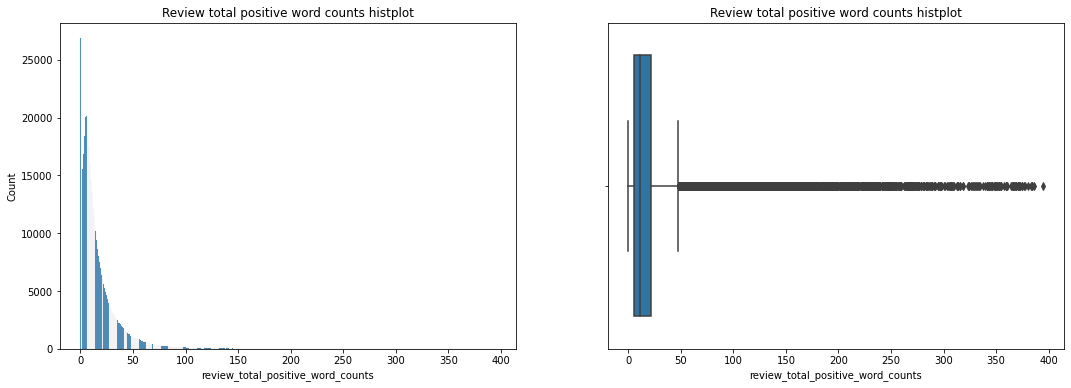

In [ ]:
# build the plots of 'review_total_positive_word_counts'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

histplot = sns.histplot(data=hotels, x='review_total_positive_word_counts', ax=axes[0])
histplot.set_title('Review total positive word counts histplot')
boxplot = sns.boxplot(data=hotels, x='review_total_positive_word_counts', ax=axes[1])
boxplot.set_title('Review total positive word counts histplot')

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
  if log_scale:
    x = np.log(data[feature]+1)
  else:
    x = data[feature]
  mu = x.mean()
  sigma = x.std()
  lower_bound = mu - left * sigma
  upper_bound = mu + right * sigma
  outliers = data[(x < lower_bound) | (x > upper_bound)] 
  return outliers

outliers = outliers_z_score(hotels, 'review_total_positive_word_counts', log_scale=True, left=3, right=3)

print(f'Number of outliers z-score method: {outliers.shape[0]}')

Number of outliers z-score method: 160


There are too much the outliers.

In [ ]:
# let see describe of the feature 'total_number_of_reviews_reviewer_has_given'
hotels['total_number_of_reviews_reviewer_has_given'].describe()

count    386496.000000
mean          7.176211
std          11.052453
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max         355.000000
Name: total_number_of_reviews_reviewer_has_given, dtype: float64

Text(0.5, 1.0, 'Total number of_reviews reviewer has given')

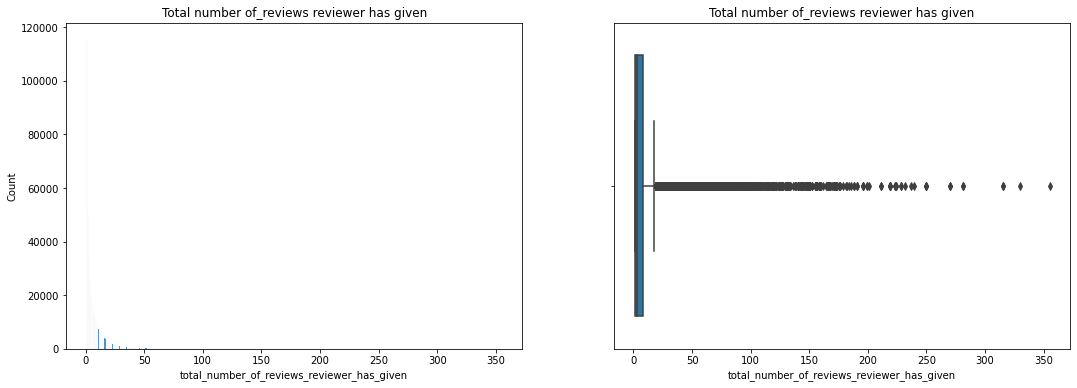

In [ ]:
# build the plots 'total_number_of_reviews_reviewer_has_given'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

histplot = sns.histplot(data=hotels, x='total_number_of_reviews_reviewer_has_given', ax=axes[0])
histplot.set_title('Total number of_reviews reviewer has given')
boxplot = sns.boxplot(data=hotels, x='total_number_of_reviews_reviewer_has_given', ax=axes[1])
boxplot.set_title('Total number of_reviews reviewer has given')

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
  if log_scale:
    x = np.log(data[feature]+1)
  else:
    x = data[feature]
  mu = x.mean()
  sigma = x.std()
  lower_bound = mu - left * sigma
  upper_bound = mu + right * sigma
  outliers = data[(x < lower_bound) | (x > upper_bound)] 
  return outliers

outliers = outliers_z_score(hotels, 'total_number_of_reviews_reviewer_has_given', log_scale=True, left=4, right=4)

print(f'Number of outliers z-score method: {outliers.shape[0]}')

Number of outliers z-score method: 40


There are too much the outliers.

In [ ]:
# let see describe of the feature 'reviewer_score'
hotels['reviewer_score'].describe()

count    386496.000000
mean          8.397299
std           1.635747
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: reviewer_score, dtype: float64

Text(0.5, 1.0, 'reviewer_score boxplot')

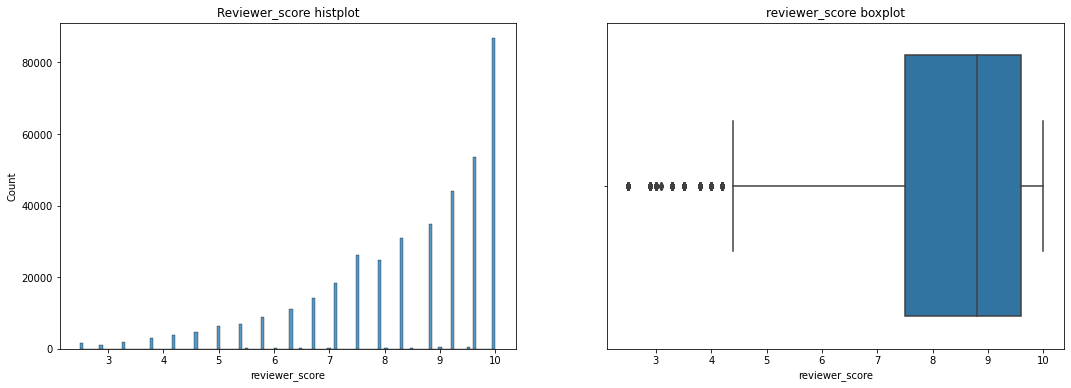

In [ ]:
# build the plots 'reviewer_score'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

histplot = sns.histplot(data=hotels, x='reviewer_score', ax=axes[0])
histplot.set_title('Reviewer_score histplot')
boxplot = sns.boxplot(data=hotels, x='reviewer_score', ax=axes[1])
boxplot.set_title('reviewer_score boxplot')

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
  if log_scale:
    x = np.log(data[feature]+1)
  else:
    x = data[feature]
  mu = x.mean()
  sigma = x.std()
  lower_bound = mu - left * sigma
  upper_bound = mu + right * sigma
  outliers = data[(x < lower_bound) | (x > upper_bound)] 
  return outliers

outliers = outliers_z_score(hotels, 'reviewer_score', log_scale=True, left=4.7, right=4)

print(f'Number of outliers z-score method: {outliers.shape[0]}')

Number of outliers z-score method: 1628


There are too much the outliers.

SUMMARY.
It was not possible to find any obvious outliers.

===================================

# 3. EDA

## 3.1. Feature engineering 

#### Create 'hotel_city' feature

In [ ]:
# Upload dataset with countries & cities
cities = pd.read_csv('/content/drive/MyDrive/data_for_lessons/worldcities.csv')
cities.head()
# list of city
city_l = cities['city']
# list of countries
country = cities['country']

# Create list of tuples (city,country)
city_country = []
for x, y in zip(list(cities['city']),list(cities['country'])):
    city_country.append((x,y))

In [ ]:
# Split hotel_address for extract city
hotels['hotel_address'] = hotels['hotel_address'].apply(lambda x: x.split(' '))

In [ ]:
# Extract the name of the city
def get_city(address):
  for i in city_l:
    if i in address:
      return i

# Create the new feature 'hotel_city'
hotels['hotel_city'] = hotels['hotel_address'].apply(get_city)  

In [ ]:
# Number of the unique cities
hotels['hotel_city'].value_counts()

London        196773
Barcelona      45132
Paris          44528
Amsterdam      43004
Vienna         29177
Milan          27375
Lima             448
Washington        59
Name: hotel_city, dtype: int64

It seems there is a mistake in the 'hotel_city' feature. Let's take a closer look at cities: Lima and Washington. 

In [ ]:
hotels[hotels['hotel_city']=='Lima'][['hotel_address','hotel_city']].head()

,hotel_address,hotel_city
389,"[Piazza, Lima, 2, Central, Station, 20124, Mil...",Lima
1037,"[Piazza, Lima, 2, Central, Station, 20124, Mil...",Lima
3083,"[Piazza, Lima, 2, Central, Station, 20124, Mil...",Lima
3765,"[Piazza, Lima, 2, Central, Station, 20124, Mil...",Lima
4145,"[Piazza, Lima, 2, Central, Station, 20124, Mil...",Lima


In [ ]:
hotels[hotels['hotel_city']=='Washington'][['hotel_address','hotel_city']].head()

,hotel_address,hotel_city
1605,"[Via, Washington, 66, Fiera, Milano, City, 201...",Washington
9988,"[Via, Washington, 66, Fiera, Milano, City, 201...",Washington
18908,"[Via, Washington, 66, Fiera, Milano, City, 201...",Washington
21200,"[Via, Washington, 66, Fiera, Milano, City, 201...",Washington
24487,"[Via, Washington, 66, Fiera, Milano, City, 201...",Washington


Piazza, Lima and Via, Washington are the Milan city. So we'll change these features.

In [ ]:
hotels['hotel_city'] = hotels['hotel_city'].apply(lambda x: 'Milan' if x=='Lima' or x=='Washington' else x)
hotels['hotel_city'].value_counts()

London       196773
Barcelona     45132
Paris         44528
Amsterdam     43004
Vienna        29177
Milan         27882
Name: hotel_city, dtype: int64

In [ ]:
# Create the 'lat_city' feature

def get_lat_city(x):
  if x == 'London':
    return 51.5085
  elif x == 'Barcelona':
    return 41.3888
  elif x == 'Paris':
    return 48.8534
  elif x == 'Amsterdam':
    return 52.374
  elif x == 'Vienna':
    return 48.2085
  elif x == 'Milan':
    return 45.4643

hotels['lat_city'] = hotels['hotel_city'].apply(get_lat_city)

In [ ]:
# Create the 'lng_city' feature

def get_lng_city(x):
  if x == 'London':
    return -0.12574
  elif x == 'Barcelona':
    return 2.15899
  elif x == 'Paris':
    return 2.3488
  elif x == 'Amsterdam':
    return 4.88969
  elif x == 'Vienna':
    return 16.3721
  elif x == 'Milan':
    return 9.18951

hotels['lng_city'] = hotels['hotel_city'].apply(get_lng_city)

In [ ]:
# fill in the NaN values in lat and lng

city_coord_lt = {
    'London': 51.5085,
    'Barcelona': 41.3888,
    'Paris': 48.8534,
    'Amsterdam': 52.374,
    'Vienna': 48.2085,
    'Milan': 45.4643
}  

city_coord_lng = {
    'London': -0.12574,
    'Barcelona': 2.15899,
    'Paris': 2.3488,
    'Amsterdam': 4.88969,
    'Vienna': 16.3721,
    'Milan': 9.18951
} 

hotels['lat_lng_city'] = list(zip(hotels.lat,hotels.lng,hotels.hotel_city))
hotels['lat_lng'] = hotels['lat_lng_city'].apply(lambda x: (city_coord_lt[x[2]],city_coord_lng[x[2]]) if math.isnan(x[0]) else (x[0],x[1]))

In [ ]:
# The lat & lng without NaN
hotels['lat1'] = hotels['lat_lng'].apply(lambda x: x[0])
hotels['lng1'] = hotels['lat_lng'].apply(lambda x: x[1])

In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the geodesic module from the geopy library 
from geopy.distance import geodesic as GD 

In [ ]:
# Create the new feature 'distance' from the center of the city
hotels['distance'] = hotels.apply(lambda x: GD((x['lat1'],x['lng1']),(x['lat_city'],x['lng_city'])).km, axis=1)

hotels['distance'].describe()

count    386496.000000
mean          3.143684
std           2.580516
min           0.000000
25%           1.315286
50%           2.533573
75%           4.114090
max          17.303428
Name: distance, dtype: float64

#### Extract  integer values from the 'days_since_review'

In [ ]:
# Extract integer values from the 'days_since_review' feature
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: int(x.split(' ')[0]))

#### Create 'review_year' & 'review_quarter' features



In [ ]:
# create review_year feature
#hotels['review_year'] = pd.to_datetime(hotels['review_date']).dt.year

# create review_quarter feature
hotels['review_quarter'] = pd.to_datetime(hotels['review_date']).dt.quarter

In [ ]:
hotels['review_quarter'].value_counts()

3    106724
2     99073
1     91092
4     89607
Name: review_quarter, dtype: int64

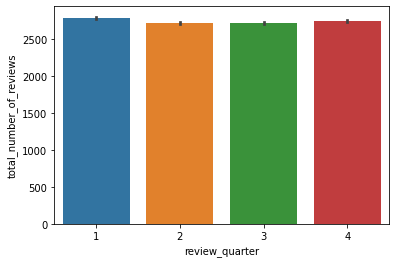

In [ ]:
# Let's look at the 'total_number_of_reviews' depending on the quarter
sns.barplot(data=hotels, x='review_quarter',y='total_number_of_reviews')

#### Create 'reviewer_region' feature



In [ ]:
# Upload dataset with countries & regions
countries_regions = pd.read_csv('/content/drive/MyDrive/data_for_lessons/countries_regions.csv')

In [ ]:
# Upload dataset with countries2 & codes
countries_codes = pd.read_csv('/content/drive/MyDrive/data_for_lessons/iso2-country-codes.csv', sep=',')

In [ ]:
# Change the name in the countries & regions dataset
def change_name(alpha):
  for i, j in zip(list(countries_codes['Alpha-2 code']), list(countries_codes['English short name lower case'])):
    if alpha == i:
      return j

countries_regions['name'] = countries_regions['alpha-2'].apply(change_name)
countries_regions['name'] = countries_regions['name'].apply(lambda x: str(x).lower())

In [ ]:
# Remove the indents in the 'reviewer_nationality'
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(lambda x: x[1:(len(x)-1)])
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(lambda x: str(x).lower())

# Create list of the dictionaries {country, region}
country_region = []
for x, y in zip(list(countries_regions['name']),list(countries_regions['region'])):
    country_region.append({x:y})  

In [ ]:
# add new feature 'reviewer_region'
def get_region_reviewer(country):
    for i in country_region:
      if country in i:
        return i[country] 

hotels['reviewer_region'] = hotels['reviewer_nationality'].apply(get_region_reviewer)

In [ ]:
# fill in the null values 
hotels['reviewer_region'] = hotels['reviewer_region'].fillna('unrecognized')

hotels['reviewer_region'].value_counts()

Europe          269246
Asia             54705
Americas         36246
Oceania          18768
Africa            6700
unrecognized       831
Name: reviewer_region, dtype: int64

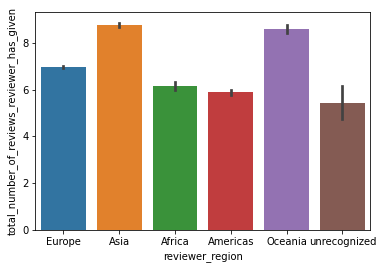

In [ ]:
# Let's look at the 'total_number_of_reviews' depending on the quarter
sns.barplot(data=hotels, x='reviewer_region', y='total_number_of_reviews_reviewer_has_given')

#### Create 'negative_review_yes_no' feature

In [ ]:
# create list of the positive phrase in the negative reviwes
positive_in_neg_reviews = [
 ' Nothing',
 ' Nothing ',
 'No Negative',
 ' No Negative',
 ' No Negative ',
 ' Absolutely nothing',
 ' Absolutely nothing ',
 ' All fine',
 ' All fine ',
 ' All good',
 ' All good ',
 ' All great',
 ' All great ',
 ' All ok',
 ' All ok ',
 ' All perfect',
 ' All perfect ',
 ' All was fine',
 ' All was fine ',
 ' All was good',
 ' All was good ',
 ' All was great',
 ' All was perfect',
 ' All was perfect ',
 ' Cannot think of anything',
 ' Cannot think of anything ',
 ' Can t fault it',
 ' Can t fault it ',
 ' Can t think of anything',
 ' Can t think of anything ',
 ' Couldn t fault it',
 ' Couldn t fault it ',
 ' Could not fault anything',
 ' Could not fault anything ',
 ' Everything perfect',
 ' Everything perfect ',
 ' Everything was excellent',
 ' Everything was excellent ',
 ' Everything was fine',
 ' Everything was fine ',
 ' Everything was good',
 ' Everything was good ',
 ' Everything was great',
 ' Everything was great ',
 ' Everything was ok',
 ' Everything was ok ',
 ' Everything was perfect',
 ' Everything was perfect ',
 ' Everything was very good',
 ' Everything was very good ',
 ' Faultless',
 ' Faultless ',
 ' Going home',
 ' Going home ',
 ' Happy with everything',
 ' Happy with everything ',
 ' Having to leave',
 ' Having to leave ',
 ' It was all good',
 ' It was all good ',
 ' It was perfect',
 ' It was perfect ',
 ' I cannot think of anything ',
 ' I can t think of anything',
 ' I can t think of anything ',
 ' I have no complaints',
 ' I have no complaints ',
 ' I liked everything',
 ' I liked everything ',
 ' I liked it all',
 ' I liked it all ',
 ' I loved everything ',
 ' Liked everything',
 ' Liked everything ',
 ' Liked it all',
 ' Liked it all ',
 ' Loved everything',
 ' Loved everything ',
 ' Loved it all',
 ' Loved it all ',
 ' NOTHING',
 ' NOTHING ',
 ' Na',
 ' Na ',
 ' Nithing',
 ' Nithing ',
 ' No',
 ' Non',
 ' None',
 ' None ',
 ' Non ',
 ' Nope',
 ' Nope ',
 ' Nothin',
 ' Nothings',
 ' Nothings ',
 ' Nothing All good',
 ' Nothing All good ',
 ' Nothing I can think of',
 ' Nothing I can think of ',
 ' Nothing I didn t like',
 ' Nothing I didn t like ',
 ' Nothing I did not like',
 ' Nothing I did not like ',
 ' Nothing all excellent',
 ' Nothing all excellent ',
 ' Nothing all good',
 ' Nothing all good ',
 ' Nothing all great',
 ' Nothing all great ',
 ' Nothing all perfect',
 ' Nothing all perfect ',
 ' Nothing at all',
 ' Nothing at all ',
 ' Nothing bad',
 ' Nothing bad ',
 ' Nothing bad to report',
 ' Nothing bad to report ',
 ' Nothing bad to say',
 ' Nothing bad to say ',
 ' Nothing comes to mind',
 ' Nothing comes to mind ',
 ' Nothing could have been better',
 ' Nothing could have been better ',
 ' Nothing everything was great',
 ' Nothing everything was great ',
 ' Nothing everything was perfect',
 ' Nothing everything was perfect ',
 ' Nothing in particular',
 ' Nothing in particular ',
 ' Nothing it was all good',
 ' Nothing it was all good ',
 ' Nothing it was all great',
 ' Nothing it was all great ',
 ' Nothing it was perfect',
 ' Nothing it was perfect ',
 ' Nothing much',
 ' Nothing much ',
 ' Nothing negative to say',
 ' Nothing negative to say ',
 ' Nothing not to like',
 ' Nothing not to like ',
 ' Nothing of note',
 ' Nothing of note ',
 ' Nothing really',
 ' Nothing really ',
 ' Nothing special',
 ' Nothing special ',
 ' Nothing specific',
 ' Nothing specific ',
 ' Nothing that I can think of',
 ' Nothing that I can think of ',
 ' Nothing to complain',
 ' Nothing to complain ',
 ' Nothing to complain about',
 ' Nothing to complain about ',
 ' Nothing to dislike',
 ' Nothing to dislike ',
 ' Nothing to fault',
 ' Nothing to fault ',
 ' Nothing to mention',
 ' Nothing to mention ',
 ' Nothing to not like',
 ' Nothing to not like ',
 ' Nothing to report',
 ' Nothing to report ',
 ' Nothing worth mentioning ',
 ' Nothinh ',
 ' Nothin ',
 ' Not a thing',
 ' Not a thing ',
 ' Not much',
 ' Not much ',
 ' Not one thing',
 ' Not one thing ',
 ' Nowt',
 ' Nowt ',
 ' No ',
 ' No bad experience',
 ' No bad experiences',
 ' No bad experiences ',
 ' No bad experience ',
 ' No complaints',
 ' No complaints ',
 ' No complaints at all',
 ' No complaints at all ',
 ' No complaints whatsoever',
 ' No complaints whatsoever ',
 ' No dislikes',
 ' No dislikes ',
 ' No faults',
 ' No faults ',
 ' No issues',
 ' No issues ',
 ' No issues at all',
 ' No issues at all ',
 ' No negatives',
 ' No negatives ',
 ' No negative comments',
 ' No negative comments ',
 ' No problems',
 ' No problems ',
 ' N A',
 ' N A ',
 ' N a',
 ' N a ',
 ' Perfect',
 ' Perfect ',
 ' That we had to leave',
 ' That we had to leave ',
 ' There wasn t anything we didn t like',
 ' There wasn t anything we didn t like ',
 ' There was nothing I didn t like',
 ' There was nothing I didn t like ',
 ' There was nothing not to like',
 ' There was nothing not to like ',
 ' There was nothing that we didn t like',
 ' There was nothing that we didn t like ',
 ' There was nothing to dislike',
 ' There was nothing to dislike ',
 ' There was nothing we didn t like',
 ' There was nothing we didn t like ',
 ' Was all good',
 ' Was all good ',
 ' We liked everything',
 ' We liked everything ',
 ' What s not to like',
 ' What s not to like ',
 ' Zero',
 ' Zero ',
 ' all good',
 ' all good ',
 ' all ok',
 ' all ok ',
 ' na',
 ' no',
 ' none',
 ' none ',
 ' nothing',
 ' nothing ',
 ' nothing really',
 ' nothing really ',
 ' nothing to complain about',
 ' nothing to complain about ',
 ' nothing to dislike',
 ' nothing to dislike ',
 ' no ',
 ' no complaints',
 ' no complaints ',
 ' no thing',
 ' no thing ',
 ' n a',
 ' n a ',
 ' Not applicable',
 ' Not applicable ',
 ' No problems at all',
 ' No problems at all ']

In [ ]:
# create feature 'negative_review_yes_no'
hotels['negative_review_yes_no'] = hotels['negative_review'].apply(lambda x: 0 if x in positive_in_neg_reviews else 1)

In [ ]:
hotels['negative_review_yes_no'].value_counts()

1    265611
0    120885
Name: negative_review_yes_no, dtype: int64

#### Create 'positive_review_yes_no' feature

In [ ]:
# create list of the negative phrase in the negative reviews
negative_in_pos_reviews = [
 'No Positive',
 ' No Positive',
 ' No Positive ',
 ' Nothing',
 ' Nothing ',
 'Nothing',
 'nothing',
 ' nothing',
 ' nothing ',
 'Not much',
 ' Not much',
 ' Not much ',
 'Location only',
 ' Location only',
 ' Location only ',
 ' Not a lot',
 ' Not a lot ',
 'Not a lot',
 ' Only location',
 ' Only location ',
 'Only location',
 'Nothing at all',
 ' Nothing at all',
 ' Nothing at all ',
 'N A',
 ' N A ',
 ' N A',
 'None',
 ' None',
 ' None ',
 'Nothing really',
 ' Nothing really',
 ' Nothing really ',
 'Nothing special',
 ' Nothing special',
 ' Nothing special ',
 'No',
 ' No',
 ' No ',
 'No thing',
 ' No thing',
 ' No thing ',
 'N a',
 ' N a ',
 ' N a',
 'NOTHING',
 ' NOTHING',
 ' NOTHING ',
 ' Nothing much',
 'Nothing much',
 ' Nothing much ',
 'Nothing at all',
 ' Nothing at all',
 ' Nothing at all ',
 'Nothing in particular',
 ' Nothing in particular ',
 ' Nothing in particular',
 'no',
 ' no',
 ' no ',
 'Not alot',
 ' Not alot',                               
 ' Not alot ',
 'NA',
 ' NA',
 ' NA ',
 'No breakfast',
 ' No breakfast',
 ' No breakfast ']

In [ ]:
# create feature 'positive_review_yes_no'
hotels['positive_review_yes_no'] = hotels['positive_review'].apply(lambda x: 0 if x in negative_in_pos_reviews else 1)

In [ ]:
hotels['positive_review_yes_no'].value_counts()

1    357783
0     28713
Name: positive_review_yes_no, dtype: int64

#### Create the 'nights' feature

In [ ]:
lst_night = [' Stayed 1 night ',' Stayed 2 nights ',' Stayed 3 nights ',' Stayed 4 nights ',' Stayed 5 nights ',' Stayed 6 nights ',\
             ' Stayed 7 nights ',' Stayed 8 nights ',' Stayed 9 nights ',' Stayed 10 nights ',' Stayed 11 nights ',\
             ' Stayed 12 nights ',' Stayed 13 nights ',' Stayed 14 nights ',' Stayed 15 nights ',' Stayed 16 nights ',' Stayed 17 nights ',\
              ' Stayed 18 nights ',' Stayed 19 nights ',' Stayed 20 nights ',' Stayed 21 nights ',' Stayed 22 nights ',' Stayed 23 nights ',\
             ' Stayed 24 nights ',' Stayed 25 nights ',' Stayed 26 nights ',' Stayed 27 nights ',' Stayed 28 nights ',' Stayed 29 nights ',' Stayed 30 nights ']

def get_night(x):
  for i in lst_night:
    if i in x:
      return int(i.split(' ')[2])

hotels['nights'] = hotels['tags'].apply(get_night)

In [ ]:
# Count the values of the 'nights' feature
hotels['nights'].value_counts().sort_values(ascending=False)

1.0     145296
2.0     100176
3.0      71940
4.0      35708
5.0      15592
6.0       7388
7.0       5541
8.0       1907
9.0        966
10.0       662
11.0       305
12.0       217
14.0       184
13.0       174
15.0        87
16.0        38
17.0        27
18.0        24
19.0        23
21.0        19
20.0        17
30.0        10
27.0        10
22.0         8
28.0         7
23.0         6
26.0         6
24.0         5
25.0         4
29.0         3
Name: nights, dtype: int64

In [ ]:
# Find the None values
hotels['nights'].isnull().mean()

0.0003777529392283491

In [ ]:
# Fill in the None values
hotels['nights'] = hotels['nights'].fillna(1)

#### Create the 'Trip' feature

In [ ]:
# Create the new feature 'Leasure_trip'
hotels['Leasure_trip'] = hotels['tags'].apply(lambda x: 1 if ' Leisure trip ' in x else 0)

In [ ]:
hotels['Leasure_trip'].value_counts().sort_values(ascending=False)

1    313353
0     73143
Name: Leasure_trip, dtype: int64

#### Create the 'Travelers_qtn' feature

In [ ]:
# Create new feature
def get_travelers(x):
  if ' Couple ' in x:
    return 'Couple'
  elif ' Solo traveler ' in x:
    return 'Solo traveler'
  elif ' Group ' in x:
    return 'Group'
  elif ' Family with young children ' in x:
    return 'Family with young children'
  elif ' Family with older children ' in x:
    return 'Family with older children'
  elif ' Travelers with friends ' in x:
    return 'Travelers with friends'       

hotels['Travelers_qtn'] = hotels['tags'].apply(get_travelers)

In [ ]:
hotels['Travelers_qtn'].value_counts().sort_values(ascending=False)

Couple                        189046
Solo traveler                  81166
Group                          49057
Family with young children     45810
Family with older children     19787
Travelers with friends          1630
Name: Travelers_qtn, dtype: int64

In [ ]:
# Find the None values
hotels['Travelers_qtn'].isnull().mean()

0.0

#### Create the 'type_number' feature

In [ ]:
lst_room = [' Twin Room ',' Double Room ',' Single ',' Queen ',' King Room ',' Triple ',' Suite ',\
            ' Studio ',' Family Room ',' Quadruple ',' 2 rooms ',' 3 rooms ',' Standard Room ',' Classic Room ',\
            ' Twin Guest Room',' Double Hilton Guestroom ',' Standard Room with 1 Double Bed ',' Standard Double ',\
            ' Double Deluxe Room ',' Studio Suite ',' King Hilton Guest Room ']

lst_room1 = [' Single ',' 1 room ']
lst_room2 = [' Twin Room ',' Double Room ',' 2 rooms ',' Standard Room ',' Classic Room ',' Twin Guest Room',\
             ' Double Hilton Guestroom ',' Standard Room with 1 Double Bed ',' Standard Double ']
lst_room3 = [' Triple ',' 3 rooms ']
lst_room4 = [' Quadruple ']
lst_room5 = [' Queen ']
lst_room6 = [' King Room ',' King Hilton Guest Room ']
lst_room7 = [' Suite ']
lst_room8 = [' Studio ',' Studio Suite ']

def get_room(x):
  for i in lst_room:
    if i in lst_room1 and i in x:
      return 'Single'
    if i in lst_room2 and i in x:
      return 'Double_Twin'
    if i in lst_room3 and i in x:
      return 'Triple'
    if i in lst_room4 and i in x:
      return 'Quadruple'
    if i in lst_room5 and i in x:
      return 'Queen'
    if i in lst_room6 and i in x:
      return 'King'
    if i in lst_room7 and i in x:
      return 'Suite'
    if i in lst_room8 and i in x:
      return 'Studio'      

hotels['type_room'] = hotels['tags'].apply(get_room)

In [ ]:
hotels['type_room'].value_counts().sort_values(ascending=False)

Double_Twin    267696
Queen           22060
Single          19769
King            18670
Suite           12397
Triple           7613
Studio           3393
Quadruple        1363
Name: type_room, dtype: int64

In [ ]:
# Find the None values
hotels['type_room'].isnull().mean()

0.0867667453220732

In [ ]:
hotels['type_room'] = hotels['type_room'].fillna('Double_Twin')

#### Create the new feature 'mobile_submitt'

In [ ]:
# Create the new feature 'mobile_submitt'
hotels['mobile_submitt'] = hotels['tags'].apply(lambda x: 1 if ' Submitted from a mobile device ' in x else 0)

# Let's see the number of unique values in 'tag5_mobile_submitt'
hotels['mobile_submitt'].value_counts()

1    230608
0    155888
Name: mobile_submitt, dtype: int64

## 3.2 Feature selection, Feature coding, Normalization & Standardization 

#### Feature selection

In [ ]:
# Let's see our dataframe
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  object        
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  object        
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

In [ ]:
# Remove the unnecessary features
hotels.drop(['hotel_address','review_date','hotel_name','reviewer_nationality','negative_review',\
             'positive_review','tags','lat','lng','hotel_city','lat_city','lng_city','lat_lng',\
             'lat1','lng1','lat_lng_city','review_year'], axis=1, inplace=True)

#### Feature coding

In [ ]:
# The One Hot Encoding for some features
hotels = pd.get_dummies(hotels,columns=['review_quarter','reviewer_region','type_room','Travelers_qtn'])

In [ ]:
hotels.head(3)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,distance,negative_review_yes_no,...,type_room_Single,type_room_Studio,type_room_Suite,type_room_Triple,Travelers_qtn_Couple,Travelers_qtn_Family with older children,Travelers_qtn_Family with young children,Travelers_qtn_Group,Travelers_qtn_Solo traveler,Travelers_qtn_Travelers with friends
0,581,8.4,3,1994,4,7,10.0,531,1.246716,1,...,0,0,1,0,1,0,0,0,0,0
1,299,8.3,3,1361,2,14,6.3,203,1.403718,1,...,0,0,0,0,1,0,0,0,0,0
2,32,8.9,6,406,0,14,7.5,289,1.919501,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 711 kB/s 


We'll not use it

In [ ]:
# Binary encoding
import category_encoders as ce 

#bin_encoder = ce.BinaryEncoder(cols=['nights'])
#type_bin = bin_encoder.fit_transform(hotels['nights'])
#hotels = pd.concat([hotels, type_bin], axis=1)

#hotels.head(3)

#### Feature selection. Correlation 2.

Let's build the 'Pearson correlation' and 'Spearman correlation' matrix for the review's info. 

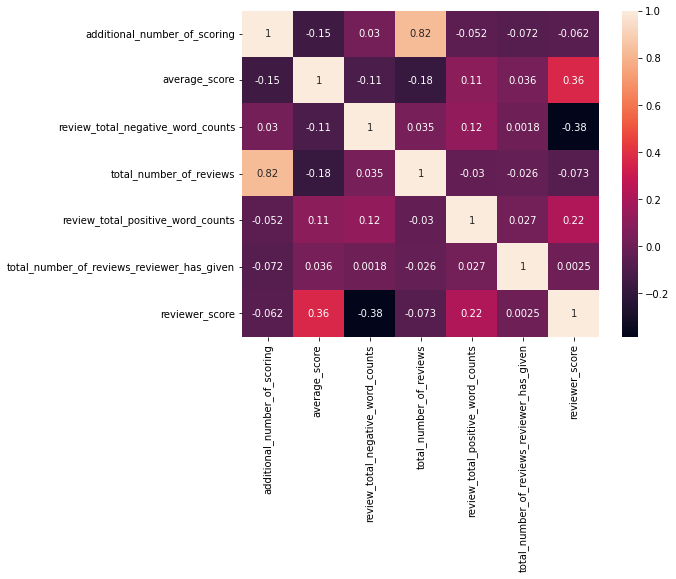

In [ ]:
# Let's build the 'Pearson correlation' matrix for the review's info
hotels_review = hotels[['additional_number_of_scoring','average_score','review_total_negative_word_counts',\
                        'total_number_of_reviews','review_total_positive_word_counts',\
                        'total_number_of_reviews_reviewer_has_given','reviewer_score']]

fig = plt.figure(figsize=(8,6))
sns.heatmap(hotels_review.corr(), annot=True)

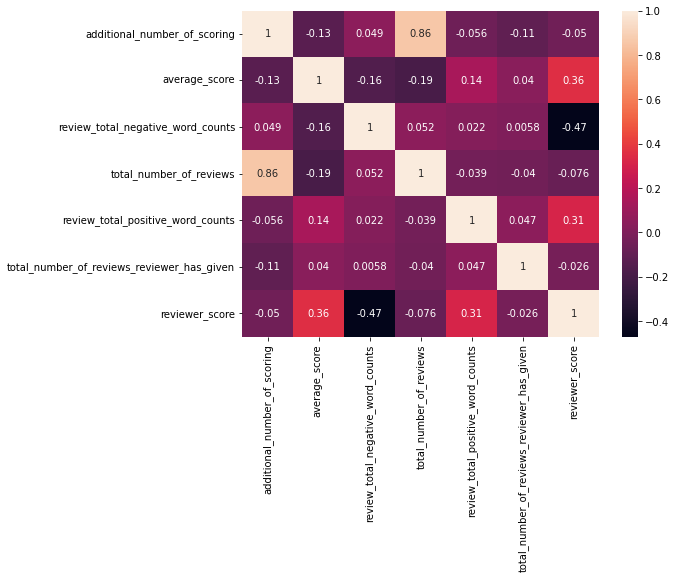

In [ ]:
# Let's build the 'Spearman correlation' matrix for the review's info
hotels_review = hotels[['additional_number_of_scoring','average_score','review_total_negative_word_counts'\
                        ,'total_number_of_reviews','review_total_positive_word_counts',\
                        'total_number_of_reviews_reviewer_has_given','reviewer_score']]

fig = plt.figure(figsize=(8,6))
sns.heatmap(hotels_review.corr(method='spearman'), annot=True)

We can see strong relationship in correlation between 'additional_number_of_scoring' and 'total_number_of_reviews' features.
Let's see on the scatterplot of this features.

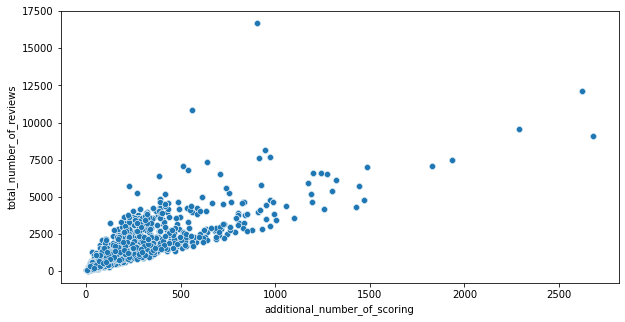

In [ ]:
ax = plt.figure(figsize=(10,5))
sns.scatterplot(data=hotels, x= 'additional_number_of_scoring', y='total_number_of_reviews')

Based on the form of the plot, we can say that the correlation between the features is positive and quite strong. With increasing values, the connection weakens. Let's make a nonparametric Spearman correlation test

In [ ]:
# Import library
from scipy.stats import spearmanr

H0 = 'There is no correlation between the features'
H1 = 'There is a correlation between the features'
alpha = 0.05 # level of significance

corr, p = spearmanr(hotels['additional_number_of_scoring'], hotels['total_number_of_reviews'])
print(f'correlation = {corr}, p = {round(p,2)}')

if p>alpha:
    print(f'{p} > {alpha}. {H0}')
else:
    print(f'{p} <= {alpha}. {H1}')

correlation = 0.8591688174949688, p = 0.0
0.0 <= 0.05. There is a correlation between the features


We've found out that there is a clear correlation between these features. The coefficient of such correlation is quite high, so we can remove one of these features. Drop the 'additional_number_of_scoring' feature.

In [ ]:
hotels.drop(['additional_number_of_scoring'],axis=1,inplace=True)

#### Normalization and Standardization 1

In [ ]:
# Import for normalization & standardization
from sklearn import preprocessing

Text(0.5, 1.0, 'reviewer_score')

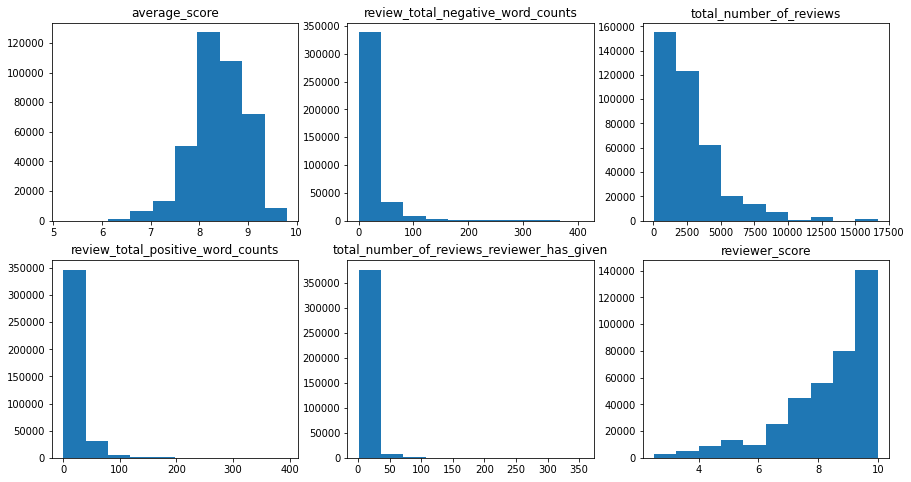

In [ ]:
# Let's see on the distribution of some review's features:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))

axes[0,0].hist(x=hotels['average_score'])
axes[0,1].hist(x=hotels['review_total_negative_word_counts'])
axes[0,2].hist(x=hotels['total_number_of_reviews'])
axes[1,0].hist(x=hotels['review_total_positive_word_counts'])
axes[1,1].hist(x=hotels['total_number_of_reviews_reviewer_has_given'])
axes[1,2].hist(x=hotels['reviewer_score'])

axes[0,0].set_title('average_score')
axes[0,1].set_title('review_total_negative_word_counts')
axes[0,2].set_title('total_number_of_reviews')
axes[1,0].set_title('review_total_positive_word_counts')
axes[1,1].set_title('total_number_of_reviews_reviewer_has_given')
axes[1,2].set_title('reviewer_score')

Obviously, the features (except average_score) are not distributed normally and there are outliers (see paragraph 2.3. 'Working with the outliers' above). So we'll use the normalization (ROBUSTSCALER). For average_score feature we'll make the normality test.

In [ ]:
# Initializing the RobustScaler normalizer
#r_scaler = preprocessing.RobustScaler()

# Copy dataset 'hotels' with our features
#hotels_copy1 = r_scaler.fit_transform(hotels[['review_total_negative_word_counts','total_number_of_reviews',\
                                              #'review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given']])

# Replacing the values in the dataset with normalized ones
#hotels[['review_total_negative_word_counts','total_number_of_reviews',\
       # 'review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given']] = \
       # pd.DataFrame(hotels_copy1, columns=['review_total_negative_word_counts',\
       # 'total_number_of_reviews','review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given'])

# display dataset after normalization
#hotels.head(3)

It seems that the 'average_score' feature is distributed normally. Let's check it out.

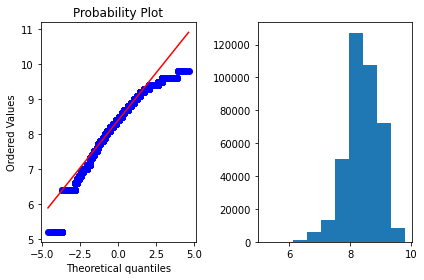

In [ ]:
# library for calculation
from scipy import stats

# Let's look at destribution and qq-plot
plt.subplot(1,2,1)
stats.probplot(hotels['average_score'], plot=plt) # qq plot

plt.subplot(1,2,2)
plt.hist(hotels['average_score']) # histogram

plt.tight_layout()
plt.show()

In general, the resulting plots are similar to normal distribution plots.
Let's make the D'Agostino's K2 normality test.


In [ ]:
# import normaltest
from scipy.stats import normaltest

H0 = 'The data is distributed normally' # null hypothesis
H1 = 'The data is not distributed normally' # alternative hypothesis
alpha = 0.05 # level of significance

_, p = normaltest(hotels['average_score'])
print(p)

# interpretation 
if p > alpha:
  print(H0)
else:
  print(H1) 

0.0
The data is not distributed normally


The data in 'average_score' feature is not distributed normally. We'll use the normalization (MinMaxScaler)

In [ ]:
# Initializing the MinMaxScaler normalizer
##mm_scaler = preprocessing.MinMaxScaler()

# Copy dataset 'hotels' with our features
#hotels_copy2 = mm_scaler.fit_transform(hotels[['average_score']])

# Replacing the values in the dataset with normalized ones
#hotels['average_score'] = pd.DataFrame(hotels_copy2, columns=['average_score'])

# display dataset after normalization
#hotels.head(3)

#### Feature selection. Correlation 2.

Let's build the Pearson and Spearman correlation matrices for the time's info

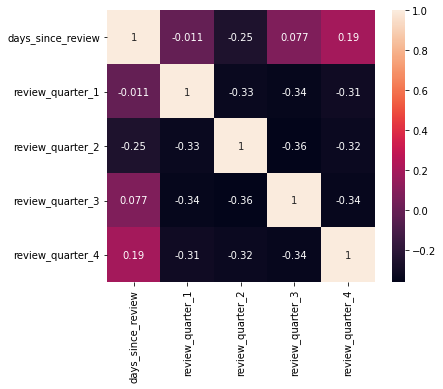

In [ ]:
hotels_time = hotels[['days_since_review','review_quarter_1','review_quarter_2','review_quarter_3','review_quarter_4']]

fig = plt.figure(figsize=(6,5))
sns.heatmap(hotels_time.corr(method='spearman'), annot=True)

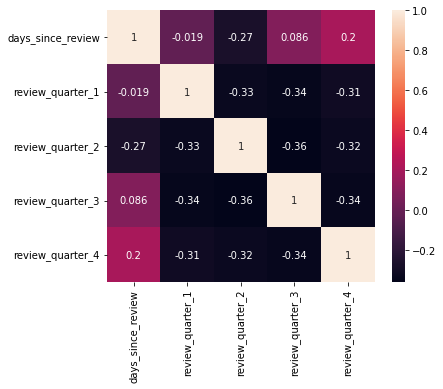

In [ ]:
fig = plt.figure(figsize=(6,5))
sns.heatmap(hotels_time.corr(), annot=True)

It seems no correlation between the features.

#### Normalization and Standardization 2

Let's check the distribution of the 'days_since_review' feature

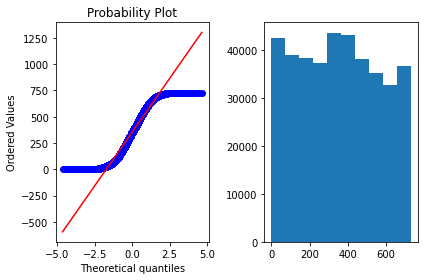

In [ ]:
# Create pp plot and histogram 
plt.subplot(1, 2, 1)
stats.probplot(hotels['days_since_review'], plot=plt) # qq plot

plt.subplot(1, 2, 2)
plt.hist(hotels['days_since_review']) # histogram

plt.tight_layout() 
plt.show() # просмотр графика

The distribution of the 'days_since_review' feature is not normal. So we can use normalization (MinMaxScaler)

In [ ]:
# Initializing the MinMaxScaler normalizer
#mm_scaler = preprocessing.MinMaxScaler()

# Copy dataset 'hotels' with our features
#hotels_copy3 = mm_scaler.fit_transform(hotels[['days_since_review']])

# Replacing the values in the dataset with normalized ones
#hotels['days_since_review'] = pd.DataFrame(hotels_copy3, columns=['days_since_review'])

# display dataset after normalization
#hotels.head(3)

#### Feature selection. Correlation 3.

Let's build the Spearman correlation matrices for the location's info

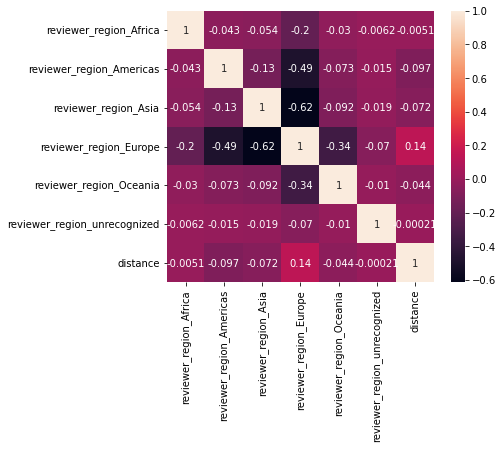

In [ ]:
reviewer_location = hotels[['reviewer_region_Africa','reviewer_region_Americas','reviewer_region_Asia',\
                            'reviewer_region_Europe','reviewer_region_Oceania','reviewer_region_unrecognized','distance']]

fig = plt.figure(figsize=(6,5))
sns.heatmap(reviewer_location.corr(method='spearman'), annot=True)                  

#### Feature selection. Correlation 4.

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 37 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386496 non-null  float64
 1   review_total_negative_word_counts           386496 non-null  int64  
 2   total_number_of_reviews                     386496 non-null  int64  
 3   review_total_positive_word_counts           386496 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 5   reviewer_score                              386496 non-null  float64
 6   days_since_review                           386496 non-null  int64  
 7   distance                                    386496 non-null  float64
 8   negative_review_yes_no                      386496 non-null  int64  
 9   positive_review_yes_no                      386496 non-null  int64  
 

Let's build the Spearman correlation matrices for the tag's info

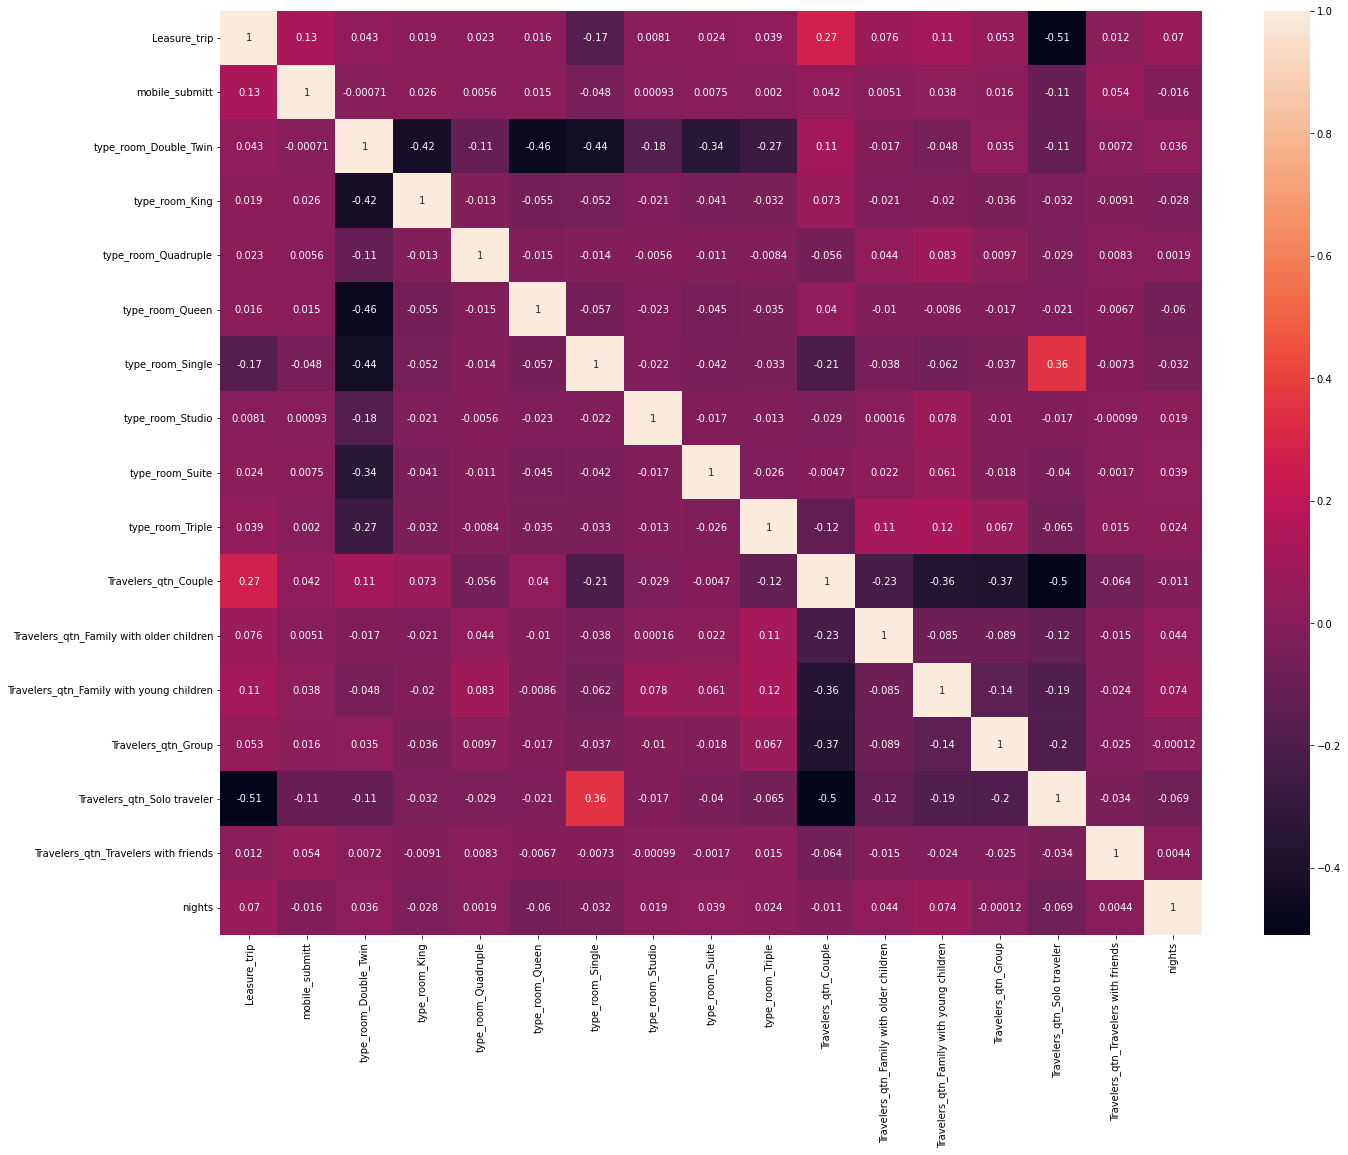

In [ ]:
hotel_tags = hotels[['Leasure_trip','mobile_submitt','type_room_Double_Twin','type_room_King','type_room_Quadruple',\
                     'type_room_Queen','type_room_Single','type_room_Studio','type_room_Suite','type_room_Triple',\
                     'Travelers_qtn_Couple','Travelers_qtn_Family with older children','Travelers_qtn_Family with young children',\
                     'Travelers_qtn_Group','Travelers_qtn_Solo traveler','Travelers_qtn_Travelers with friends','nights']]

fig = plt.figure(figsize=(22,17))
sns.heatmap(hotel_tags.corr(method='spearman'), annot=True)       

There seems to be no multicorrelation between the features

In [ ]:
hotels.isnull().mean()

average_score                                 0.0
review_total_negative_word_counts             0.0
total_number_of_reviews                       0.0
review_total_positive_word_counts             0.0
total_number_of_reviews_reviewer_has_given    0.0
reviewer_score                                0.0
days_since_review                             0.0
distance                                      0.0
negative_review_yes_no                        0.0
positive_review_yes_no                        0.0
nights                                        0.0
Leasure_trip                                  0.0
mobile_submitt                                0.0
review_quarter_1                              0.0
review_quarter_2                              0.0
review_quarter_3                              0.0
review_quarter_4                              0.0
reviewer_region_Africa                        0.0
reviewer_region_Americas                      0.0
reviewer_region_Asia                          0.0


===================================

# 4 Modelling

## 4.1. Splitting the data in the train & test

In [ ]:
# Let's break the data frame into parts necessary for training and testing the model 
# X - data with information about hotels
# y - target variable (hotel ratings)  

X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [ ]:
display(X.head(3))

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,distance,negative_review_yes_no,positive_review_yes_no,nights,...,type_room_Single,type_room_Studio,type_room_Suite,type_room_Triple,Travelers_qtn_Couple,Travelers_qtn_Family with older children,Travelers_qtn_Family with young children,Travelers_qtn_Group,Travelers_qtn_Solo traveler,Travelers_qtn_Travelers with friends
0,8.4,3,1994,4,7,531,1.246716,1,1,2.0,...,0,0,1,0,1,0,0,0,0,0
1,8.3,3,1361,2,14,203,1.403718,1,1,1.0,...,0,0,0,0,1,0,0,0,0,0
2,8.9,6,406,0,14,289,1.919501,1,0,3.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Import a special tool for splitting:  
from sklearn.model_selection import train_test_split  

In [ ]:
# Datasets labeled "train" will be used to train the model, "test" - for testing.
# For testing, we will use 25% of the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
display(X_train.shape)
print('-------------')
display(X_test.shape)
print('-------------')
display(y_train.shape)
print('-------------')
display(y_test.shape)

(289872, 36)

-------------


(96624, 36)

-------------


(289872,)

-------------


(96624,)

## 4.2. Assessment of the significance of categorical features

### chi2 for categorical features

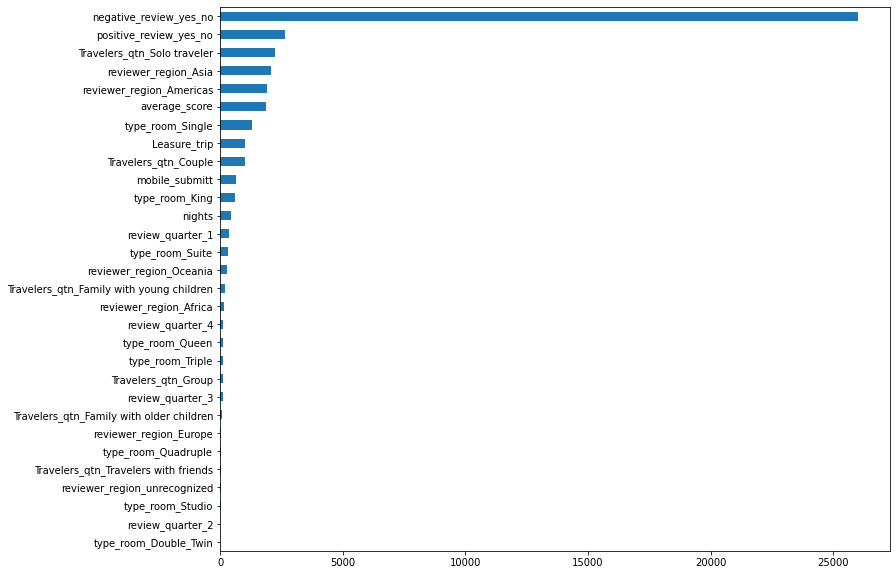

In [ ]:
fig = plt.figure(figsize=(12,10))

cat_cols = ['average_score','negative_review_yes_no','positive_review_yes_no',\
            'Leasure_trip','mobile_submitt','review_quarter_1','review_quarter_2','review_quarter_3',\
            'review_quarter_4','reviewer_region_Africa','reviewer_region_Americas','reviewer_region_Asia',\
            'reviewer_region_Europe','reviewer_region_Oceania','reviewer_region_unrecognized','type_room_Double_Twin',\
            'type_room_King','type_room_Quadruple','type_room_Queen','type_room_Single','type_room_Studio','type_room_Suite',\
            'type_room_Triple','Travelers_qtn_Couple','Travelers_qtn_Family with older children','Travelers_qtn_Family with young children',\
            'Travelers_qtn_Group','Travelers_qtn_Solo traveler','Travelers_qtn_Travelers with friends','nights']


y=y.astype('int')

from sklearn.feature_selection import chi2 

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')    

### Anova for the continuous features

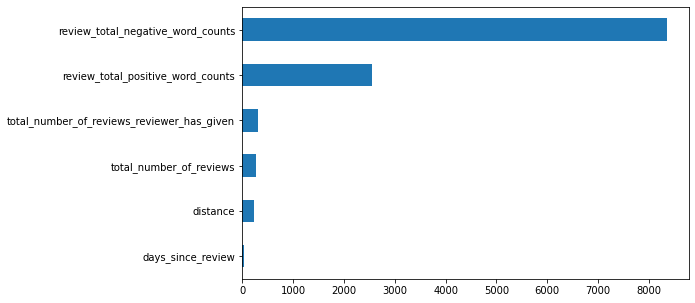

In [ ]:
fig = plt.figure(figsize=(8,5))

num_cols = ['review_total_negative_word_counts','total_number_of_reviews','review_total_positive_word_counts',\
            'total_number_of_reviews_reviewer_has_given','days_since_review','distance']


from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')     

## 4.3. Modelling 

In [ ]:

# Import libraries:  
from sklearn.ensemble import RandomForestRegressor # the tool for create and train the model 
from sklearn import metrics # the tools to evaluate the accuracy of the model
  
# Create the model 
regr = RandomForestRegressor(n_estimators=100)  
      
# Train the model on the train data
regr.fit(X_train, y_train)  
      
# Use a trained model to predict the rating of hotels in the test sample.  
# The predicted values are written to the y_pred 
y_pred = regr.predict(X_test)  

In [ ]:
# Compare the predicted values (y_pred) with the test (y_test), and see how they differ
# The metric Mean Absolute Percentage Error (MAPE) shows the average absolute percentage error of the predicted values from the actual ones.

print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13285705577786566
